In [1]:
import pandas as pd
import hvplot.pandas


In [2]:
bank_data = pd.read_csv('./hotel_bookings_raw.csv')

In [3]:
bank_data['arrival_date_year']=bank_data['arrival_date_year'].astype(str)
bank_data['arrival_date_day_of_month']=bank_data['arrival_date_day_of_month'].astype(str)
bank_data['arrival_date_str']=bank_data['arrival_date_year']+"-"+bank_data['arrival_date_month']+"-"+bank_data['arrival_date_day_of_month']
bank_data['arrival_date']=pd.to_datetime(bank_data['arrival_date_str'])
bank_data=bank_data.drop(['arrival_date_str'],axis='columns')
bank_data=bank_data.set_index('arrival_date')

In [4]:
bank_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2015-07-01,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2015-07-01,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2015-07-01,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2015-07-01,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


In [5]:
bank_data['revenue']=bank_data['adr']*(bank_data['stays_in_weekend_nights']+bank_data['stays_in_week_nights'])

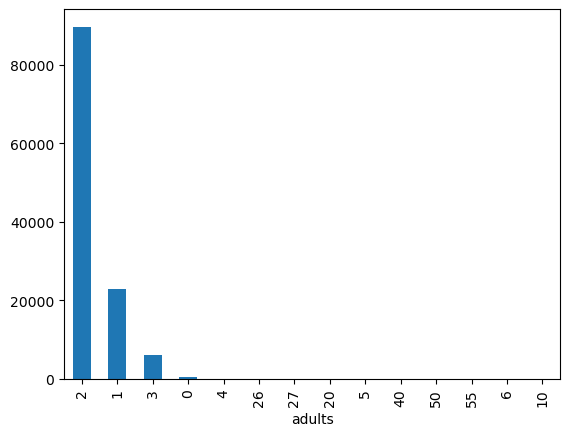

In [6]:
bank_data['adults'].value_counts().plot(kind='bar')         
bank_data = bank_data[bank_data['adults']<5]

<Axes: xlabel='adults'>

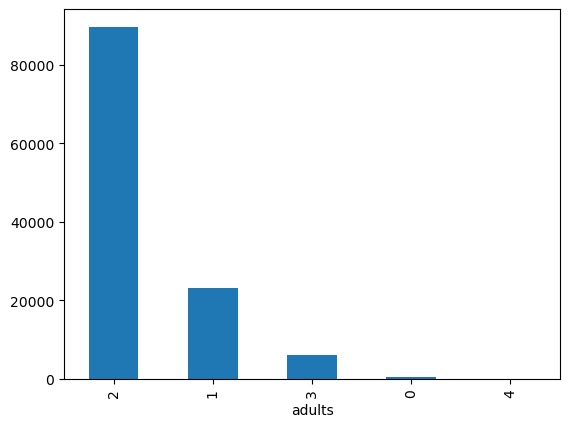

In [7]:
bank_data['adults'].value_counts().plot(kind='bar')         

<Axes: xlabel='children'>

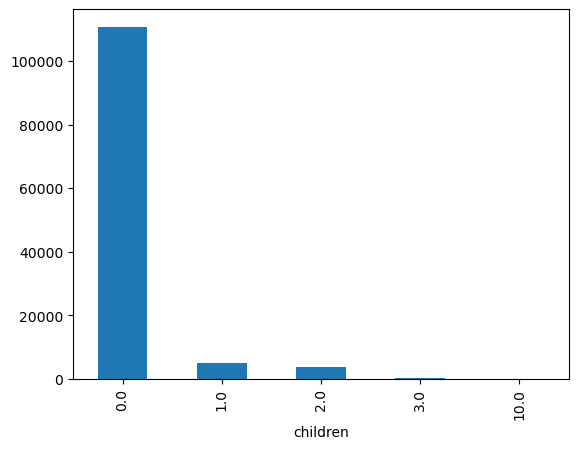

In [8]:
bank_data['children'].value_counts().plot(kind='bar')         

<Axes: xlabel='babies'>

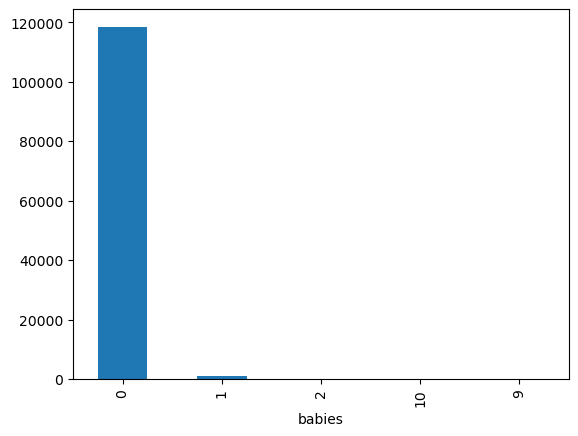

In [9]:
bank_data['babies'].value_counts().plot(kind='bar')         

In [10]:
bank_data['country'].value_counts()[0:9]

country
PRT    48574
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
Name: count, dtype: int64

<Axes: xlabel='market_segment'>

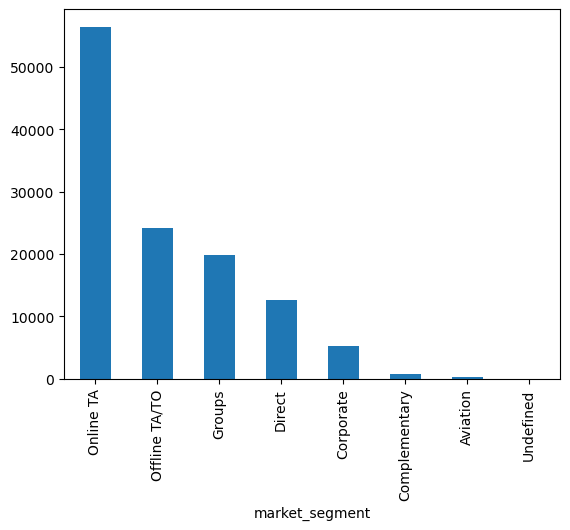

In [11]:
bank_data['market_segment'].value_counts().plot(kind='bar')         

<Axes: xlabel='distribution_channel'>

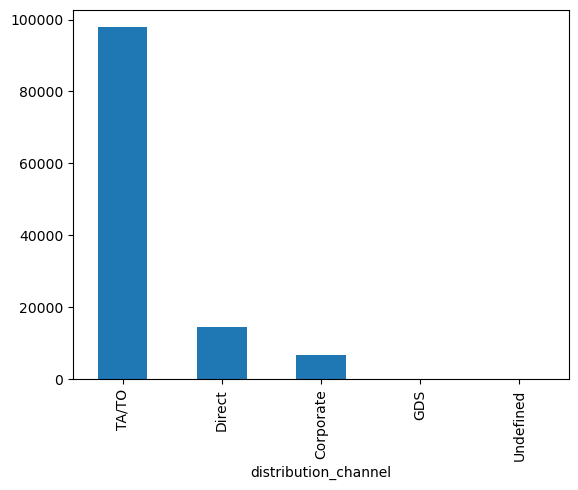

In [12]:
bank_data['distribution_channel'].value_counts().plot(kind='bar')         

<Axes: xlabel='reserved_room_type'>

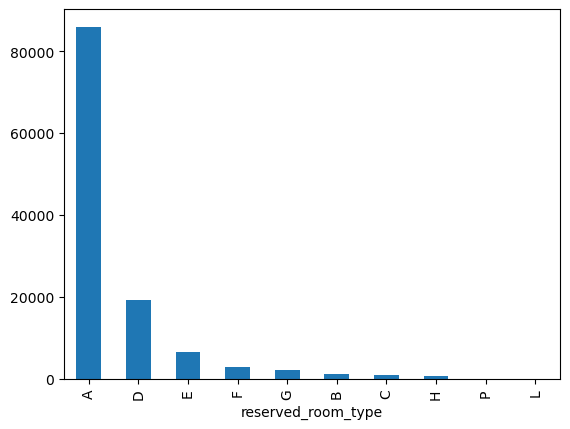

In [13]:
bank_data['reserved_room_type'].value_counts().plot(kind='bar')         

<Axes: xlabel='assigned_room_type'>

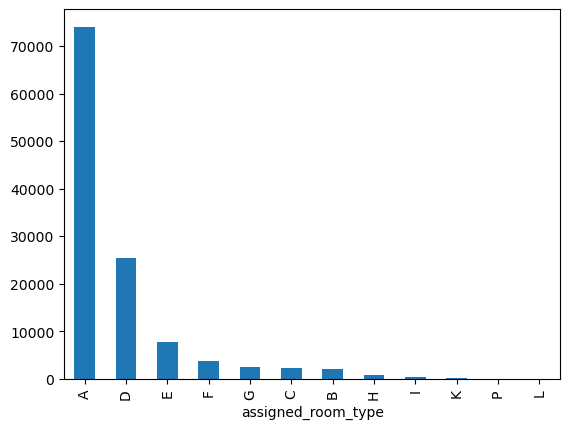

In [14]:
bank_data['assigned_room_type'].value_counts().plot(kind='bar')       

In [15]:
print(bank_data['customer_type'].value_counts())                              

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                561
Name: count, dtype: int64


In [16]:
bank_data['adr'].value_counts()                             

adr
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1943
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8879, dtype: int64

In [17]:
#print(bank_data['revenue'].value_counts().sort_values(ascending=False))
#bank_data.groupby('hotel')['revenue'].sum()
bank_data[bank_data['revenue']==0]
#come back and look for why revenue =0

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC,revenue
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0.0
2015-07-01,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0.0
2015-07-04,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0.0
2015-07-06,Resort Hotel,0,111,2015,July,28,6,0,0,2,...,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0.0
2015-07-06,Resort Hotel,0,0,2015,July,28,6,0,0,1,...,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-23,City Hotel,0,78,2017,August,34,23,0,0,1,...,0.0,96.8,4.3,1.75,19561.896,188.9,0.138513,41.2,42806.0,0.0
2017-08-24,City Hotel,0,1,2017,August,34,24,0,1,2,...,0.0,96.8,4.3,1.75,19561.896,188.9,0.138513,41.2,42806.0,0.0
2017-08-27,City Hotel,0,1,2017,August,35,27,0,0,2,...,0.0,96.8,4.3,1.75,19561.896,188.9,0.138513,41.2,42806.0,0.0


<Axes: ylabel='Frequency'>

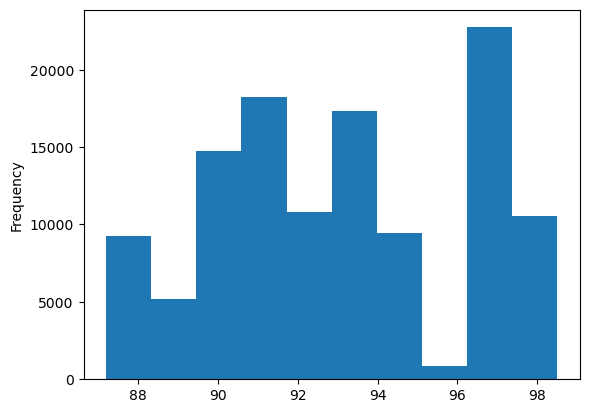

In [18]:
bank_data['CSMR_SENT'].plot(kind='hist')
                       

In [19]:
bank_data.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC,revenue
count,119374.000000,119374.000000,119374.000000,119374.000000,119374.000000,119374.000000,119370.000000,119374.000000,119374.000000,119374.000000,...,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119374.000000
mean,0.370332,103.980121,27.163528,0.927497,2.500084,1.853343,0.103904,0.007950,0.031916,0.087130,...,-0.008407,93.092511,4.827868,1.120083,18796.418311,157.645485,0.177316,41.151510,41970.578323,357.896171
std,0.482896,106.835955,13.605287,0.998619,1.908247,0.488802,0.398586,0.097443,0.175779,0.844392,...,0.095698,3.272055,0.278988,0.301915,400.931404,21.373507,0.023976,0.049977,426.678607,335.907070
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,87.200000,4.300000,0.750000,17991.348000,113.400000,0.107059,41.100000,41182.000000,-63.800000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,-0.100000,91.000000,4.700000,1.000000,18425.306000,149.800000,0.165677,41.100000,41680.000000,146.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,93.100000,4.900000,1.000000,18775.459000,161.100000,0.183547,41.200000,41850.000000,267.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,96.300000,5.000000,1.250000,19148.194000,171.500000,0.189821,41.200000,42274.000000,446.380000
max,1.000000,737.000000,53.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,...,0.100000,98.500000,5.700000,1.750000,19561.896000,204.200000,0.236504,41.200000,42834.000000,7590.000000


In [20]:
bank_data.to_csv('./clean_bank_data.csv')

c:\Users\jason\mambaforge\envs\devenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\jason\AppData\Local\Temp\ipykernel_27088\2844863145.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_revenue=pd.concat([revenue,future_datest_df])


<Axes: >

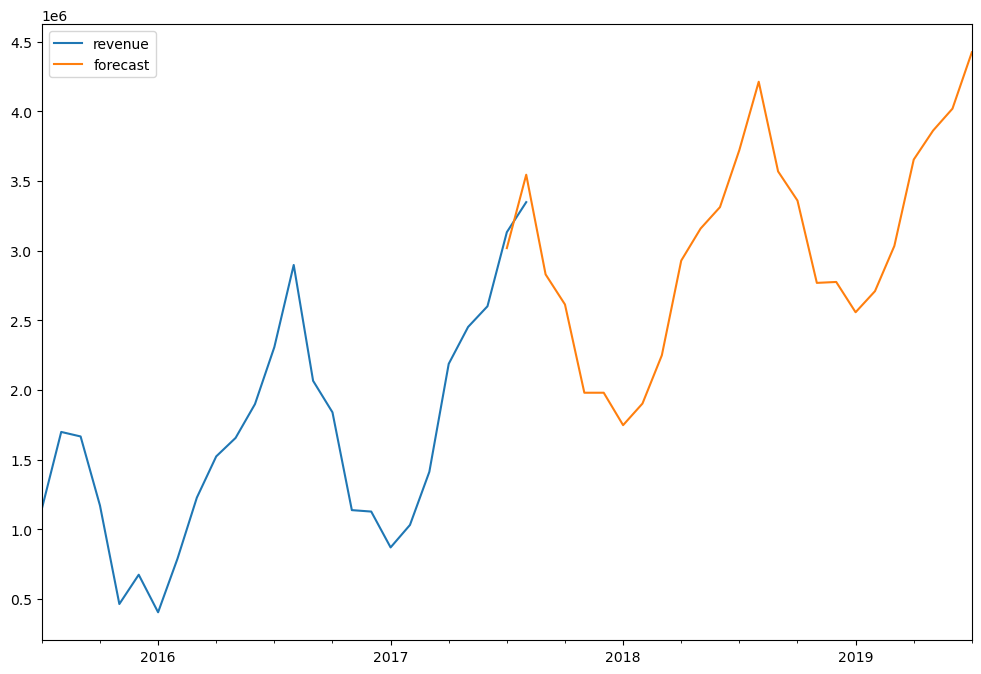

In [27]:
bank_data['revenue'].groupby('arrival_date').sum().hvplot.line()
#rolling revenue into monthly https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month
revenue=pd.DataFrame(bank_data['revenue'].groupby(pd.Grouper(freq='M')).sum())
#utilizing ARIMA to forecast forward https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(revenue,order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()
future_dates=[revenue.index[-1]+ pd.tseries.offsets.DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=revenue.columns)
future_datest_df.tail()
future_revenue=pd.concat([revenue,future_datest_df])
future_revenue['forecast'] = results.predict(start = 24, end = 25+24, dynamic= True)  
future_revenue[['revenue', 'forecast']].plot(figsize=(12, 8)) 

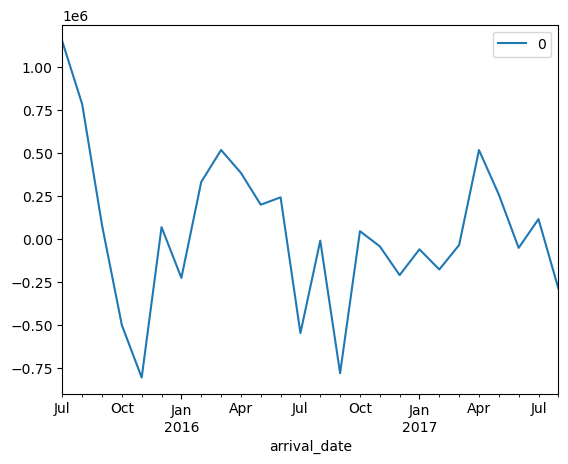

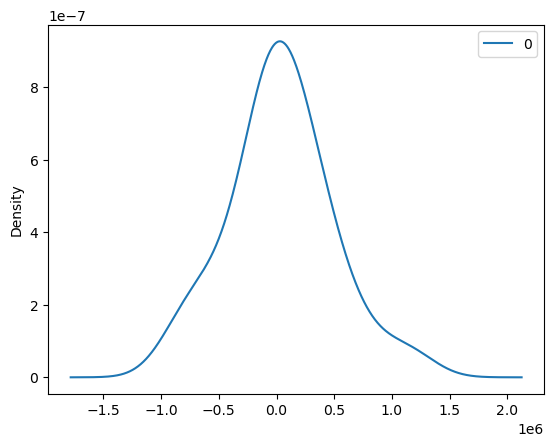

                  0
count  2.600000e+01
mean   3.567780e+04
std    4.431796e+05
min   -8.071521e+05
25%   -2.028828e+05
50%    1.681397e+04
75%    2.532549e+05
max    1.146862e+06


In [28]:
results.summary()
from matplotlib import pyplot
residuals = pd.DataFrame(results.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

,revenue
arrival_date,
2015-07-01,34640.76
2015-07-02,32049.51
2015-07-03,23564.51
2015-07-04,39708.14
2015-07-05,31137.39
...,...
2017-08-27,93481.50
2017-08-28,144165.16
2017-08-29,73559.50


C:\Users\jason\AppData\Local\Temp\ipykernel_6140\1933978786.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_revenue=pd.concat([revenue,future_datest_df])


<Axes: >

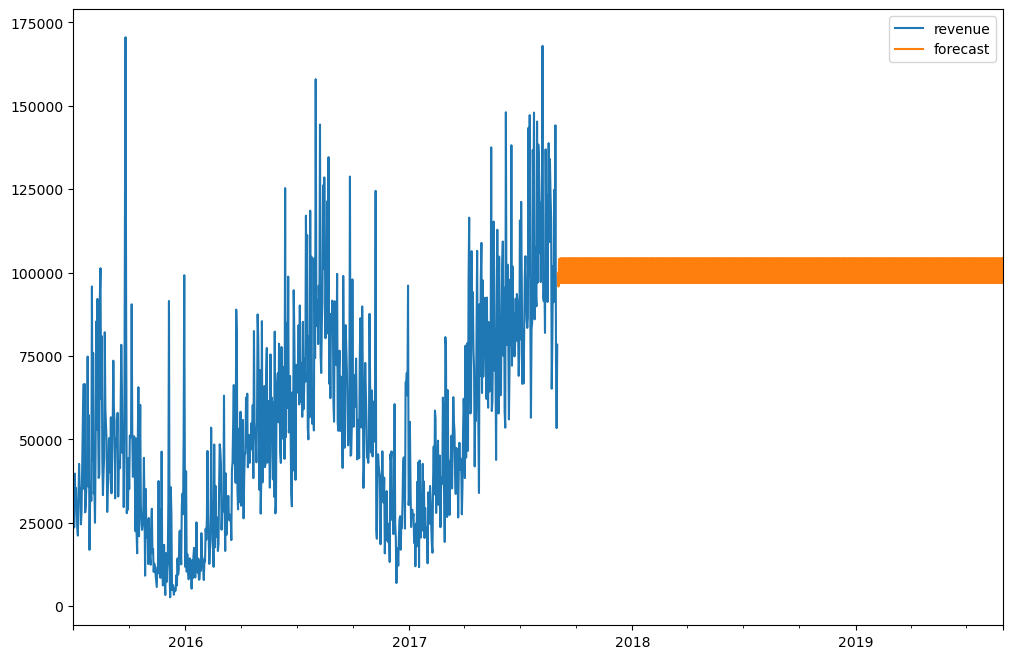